# IAML Assignment 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib.pyplot import MultipleLocator
from sklearn import tree
import graphviz
import warnings
warnings.filterwarnings('ignore')

# Question 1a

In [2]:
dataset1 = pd.read_csv('data/regression_part1.csv')
dataset1.sort_values(by="revision_time",inplace=True)

In [3]:
dataset1.shape

(50, 2)

In [4]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revision_time  50 non-null     float64
 1   exam_score     50 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB


In [5]:
round(dataset1.describe(),2)

,revision_time,exam_score
count,50.00,50.00
mean,22.22,49.92
std,13.99,20.93
min,2.72,14.73
25%,8.57,32.12
50%,21.69,47.83
75%,32.26,65.07
max,48.01,94.94


# Question 1b

In [6]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
dataset1.insert(0,"bias",1)

In [8]:
train_data = dataset1[["bias","revision_time"]]
train_label = dataset1["exam_score"]

In [9]:
linear_reg = LinearRegression(fit_intercept=False)
linear_reg.fit(train_data,train_label)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [10]:
linear_reg.coef_

array([17.89768026,  1.44114091])

# Question 1c

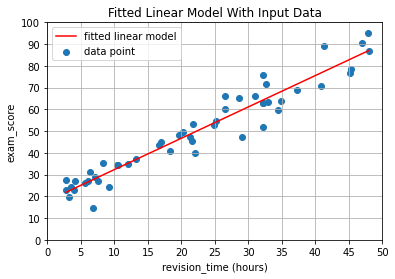

In [11]:
x = train_data
y = linear_reg.predict(x)
plt.scatter(dataset1["revision_time"],dataset1["exam_score"],label="data point")
plt.plot(train_data["revision_time"],y,color="r",label="fitted linear model")
plt.xlabel('revision_time (hours)')
plt.ylabel('exam_score')
plt.title('Fitted Linear Model With Input Data')
plt.xlim(0,50)
plt.ylim(0,100)
x_major_locator = MultipleLocator(5)
y_major_locator = MultipleLocator(10)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.grid()
plt.legend()
plt.savefig('plot/linear.png', dpi=300, bbox_inches='tight')
plt.show()

# Question 1d

In [12]:
X = dataset1[["bias","revision_time"]].values
y = dataset1["exam_score"].values
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w

array([17.89768026,  1.44114091])

# Question 1f

In [13]:
print(mean_squared_error(train_label,linear_reg.predict(train_data)))
print(mean_squared_error(train_label,train_data["bias"] * w[0] + train_data["revision_time"] * w[1]))

30.985472614541294
30.98547261454129


# Question 1g

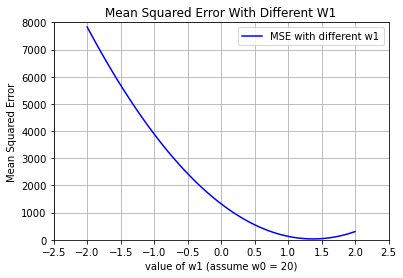

In [14]:
w0 = 20
w1 = np.linspace(-2,2,100)
results = []
for w in w1:
    predictions = train_data["bias"] * w0 + train_data["revision_time"] * w
    error = mean_squared_error(train_label,predictions)
    results.append(error)
plt.plot(w1,results,color="b",label="MSE with different w1")
plt.xlabel("value of w1 (assume w0 = 20)")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error With Different W1")
plt.ylim(0,8000)
plt.xlim(-2.5,2.5)
x_major_locator = MultipleLocator(0.5)
y_major_locator = MultipleLocator(1000)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.grid()
plt.legend()
plt.savefig('plot/MSE_line.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
min_error_w1 = w1[results.index(min(results))]
min_error_w1

1.3535353535353538

In [16]:
max(results),min(results)

(7830.3758159, 32.48096161535148)

# Question 2a

In [17]:
dataset2 = pd.read_csv("data/regression_part2.csv")
dataset2.sort_values(by="input",inplace=True)
train_data,train_label = dataset2["input"],dataset2["output"]

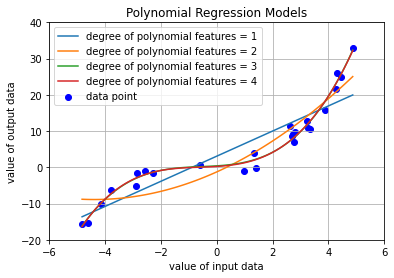

In [18]:
mse_results = {}
train_data1 = train_data[:,np.newaxis]
plt.scatter(train_data1,train_label,c="b",label="data point")
for i in range(1,5):
    poly_feature = PolynomialFeatures(degree=i)
    poly_data = poly_feature.fit_transform(train_data1)
    linear_reg = LinearRegression(fit_intercept=False)
    linear_reg.fit(poly_data,train_label)
    mse_results["N = "+str(i)] = mean_squared_error(train_label,linear_reg.predict(poly_data))
    #y = linear_reg.predict(poly_data)
    x = np.linspace(train_data1.min(),train_data1.max(),100)
    poly_x = poly_feature.fit_transform(x[:,np.newaxis])
    y = linear_reg.predict(poly_x)
    plt.plot(x, y, label="degree of polynomial features = "+str(i))
plt.xlabel("value of input data")
plt.ylabel("value of output data")
plt.title("Polynomial Regression Models")
plt.xlim(-6,6)
plt.ylim(-20,40)
plt.grid()
plt.legend()
plt.savefig('plot/Poly.png', dpi=300, bbox_inches='tight')
plt.show()    

# Question 2b

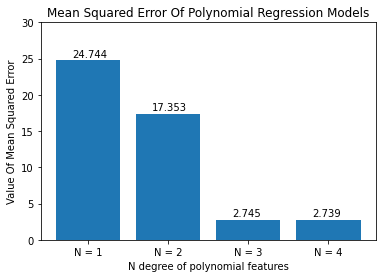

In [19]:
bar_name = list(mse_results.keys())
bar_values = list(mse_results.values())
plt.bar(x=bar_name,height=bar_values)
plt.title("Mean Squared Error Of Polynomial Regression Models")
plt.xlabel("N degree of polynomial features")
plt.ylabel("Value Of Mean Squared Error")
for i, v in enumerate(mse_results.values()):
    plt.text(i-0.2, v+0.5, str(round(v,3)))
plt.ylim(0,30)
plt.savefig('plot/MSE.png', dpi=300, bbox_inches='tight')
plt.show()

# Question 2c

In [20]:
mse_results

{'N = 1': 24.744378032672856,
 'N = 2': 17.352926937873296,
 'N = 3': 2.7447567192524263,
 'N = 4': 2.7389111790755374}

# Question 2d

In [21]:
def rbf(x,c,alpha):
    return np.exp(-0.5*((x-c)**2)/(alpha**2))

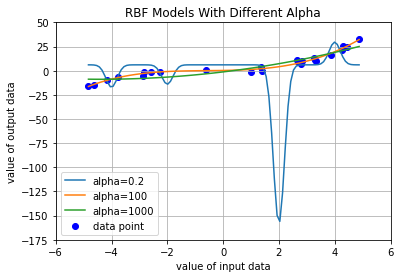

In [22]:
alpha_list = [0.2,100,1000]
x = train_data
plt.scatter(train_data,train_label,label="data point",c="b")
for alpha in alpha_list:
    rbf_train_data = np.c_[np.ones(25),rbf(x,-4.0,alpha),rbf(x,-2.0,alpha),rbf(x,2.0,alpha),rbf(x,4.0,alpha)]
    linear_reg = LinearRegression(fit_intercept=False)
    linear_reg.fit(rbf_train_data,train_label)
    #y = linear_reg.predict(rbf_train_data)
    x1 = np.linspace(train_data.min(),train_data.max(),100)
    rbf_x = np.c_[np.ones(100),rbf(x1,-4.0,alpha),rbf(x1,-2.0,alpha),rbf(x1,2.0,alpha),rbf(x1,4.0,alpha)]
    y = linear_reg.predict(rbf_x)
    plt.plot(x1,y,label="alpha="+str(alpha))
plt.xlabel("value of input data")
plt.ylabel("value of output data")
plt.title("RBF Models With Different Alpha")
#plt.xlim(-6,6)
#plt.ylim(-20,40)
plt.xlim(-6,6)
plt.ylim(-175,50)
plt.grid()
plt.legend()
plt.savefig('plot/RBF_1.png', dpi=300, bbox_inches='tight')
plt.show()

# Question 3a

In [23]:
face_train = pd.read_csv("data/faces_train_data.csv")
face_test = pd.read_csv("data/faces_test_data.csv")
face_train_data = face_train.drop(labels=["smiling"],axis=1)
face_test_data = face_test.drop(labels=["smiling"],axis=1)
face_train_label = face_train["smiling"]
face_test_label = face_test["smiling"]

In [24]:
face_train.shape

(4800, 137)

In [25]:
face_test.shape

(1200, 137)

In [26]:
face_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Columns: 137 entries, x0 to smiling
dtypes: float64(136), int64(1)
memory usage: 5.0 MB


In [27]:
face_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 137 entries, x0 to smiling
dtypes: float64(136), int64(1)
memory usage: 1.3 MB


# Question 3b

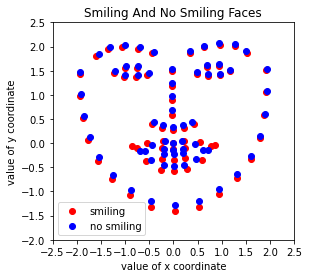

In [28]:
average_smiling_face = face_train_data[face_train_label==1].mean().values.reshape(68,2)
average_no_smiling_face = face_train_data[face_train_label==0].mean().values.reshape(68,2)
plt.scatter(average_smiling_face[:,0],average_smiling_face[:,1],c="r",label="smiling")
plt.scatter(average_no_smiling_face[:,0],average_no_smiling_face[:,1],c="b",label="no smiling")
plt.title("Smiling And No Smiling Faces")
plt.xlabel("value of x coordinate")
plt.ylabel("value of y coordinate")
plt.xlim(-2.5,2.5)
plt.ylim(-2.0,2.5)
x_major_locator = MultipleLocator(0.5)
y_major_locator = MultipleLocator(0.5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.axes().set_aspect('equal')
plt.legend()
plt.savefig('plot/smiling.png', dpi=300, bbox_inches='tight')
plt.show()

# Question 3e

In [29]:
max_depth = [2,8,20]
training_accuracy = []
test_accuracy = []
top_three_important = {}
for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth,random_state=2001)
    dt_clf.fit(face_train_data,face_train_label)
    train_predictions = dt_clf.predict(face_train_data)
    training_accuracy.append(accuracy_score(face_train_label,train_predictions)*100)
    test_predictions = dt_clf.predict(face_test_data)
    test_accuracy.append(accuracy_score(face_test_label,test_predictions)*100)
    largest_three_index = dt_clf.feature_importances_.argsort()[::-1][:3]
    largest_three_value = np.sort(dt_clf.feature_importances_)[::-1][:3]
    top_three_important[str(depth)] = (face_train_data.columns[largest_three_index].tolist(),largest_three_value) 

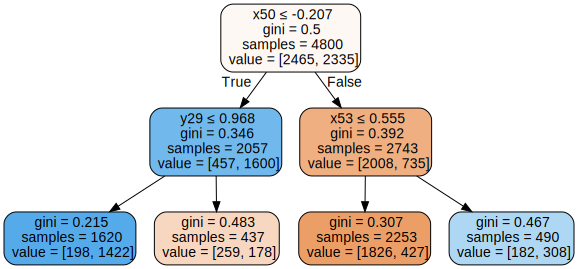

In [30]:
dt_clf = DecisionTreeClassifier(max_depth=2,random_state=2001)
dt_clf.fit(face_train_data,face_train_label)
dot_data = tree.export_graphviz(dt_clf,feature_names=face_train_data.columns.tolist(),filled=True,
                                rounded=True,special_characters=True,out_file=None)
graph = graphviz.Source(dot_data)
graph

In [31]:
pd.DataFrame(data={"max_depth":max_depth,"training_accuracy(%)":training_accuracy,"test_accuracy(%)":test_accuracy})

,max_depth,training_accuracy(%),test_accuracy(%)
0,2,79.479167,78.166667
1,8,93.354167,84.083333
2,20,100.000000,81.500000


# Question 3f

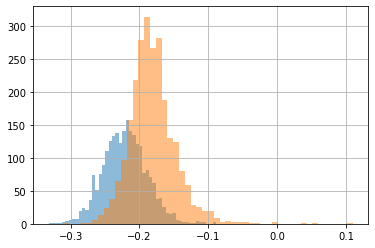

In [32]:
face_train[face_train["smiling"]==1]["x50"].hist(alpha=0.5,bins=50)
face_train[face_train["smiling"]==0]["x50"].hist(alpha=0.5,bins=50)
plt.show()

In [33]:
top_three_important["8"]

(['x50', 'y48', 'y29'], array([0.33040485, 0.08995881, 0.08831447]))

In [34]:
abs(face_train.corr()["smiling"]).sort_values(ascending=False)[:5]

smiling    1.000000
x50        0.523004
x52        0.511284
y33        0.487287
x49        0.472051
Name: smiling, dtype: float64

# Question 3g

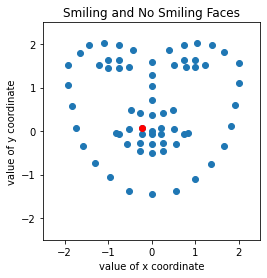

In [35]:
coordinates = face_train_data.iloc[1,:].values.reshape(68,2)
plt.scatter(coordinates[:,0],coordinates[:,1])
plt.scatter(coordinates[50,0],coordinates[50,1],c="r")
plt.title("Smiling and No Smiling Faces")
plt.xlabel("value of x coordinate")
plt.ylabel("value of y coordinate")
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.axes().set_aspect('equal')
plt.show()

# Question 4a

In [36]:
dataset3 = pd.read_csv("data/classification_eval_1.csv")

In [37]:
dataset3[dataset3[["alg_1","alg_2","alg_3","alg_4"]]>=0.5] = 1
dataset3[dataset3[["alg_1","alg_2","alg_3","alg_4"]]<0.5] = 0

In [38]:
dataset3["gt"].sum()

202

In [39]:
accuracy_scores = []
for i in range(1,5):
    accuracy_scores.append(accuracy_score(dataset3["gt"],dataset3["alg_"+str(i)])*100)

In [40]:
print(accuracy_scores)

[61.6, 55.00000000000001, 32.1, 32.9]


# Question 4b

In [41]:
dataset3 = pd.read_csv("data/classification_eval_1.csv")
roc_auc_scores = []
for i in range(1,5):
    roc_auc_scores.append(roc_auc_score(dataset3["gt"],dataset3["alg_"+str(i)]))

In [42]:
roc_auc_scores

[0.7320932281198045,
 0.6316285763914737,
 0.06395009801732053,
 0.8473876522990644]

# Question 4c

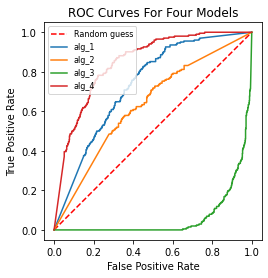

In [43]:
dataset3 = pd.read_csv("data/classification_eval_1.csv")
plt.plot([0,1],[0,1],"r--",label="Random guess")
for col_name in ["alg_1","alg_2","alg_3","alg_4"]:
    fpr, tpr, _ = roc_curve(dataset3["gt"], dataset3[col_name])
    plt.plot(fpr, tpr, label=col_name)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curves For Four Models")
plt.legend(loc="upper left",fontsize=8)
plt.axes().set_aspect('equal')
plt.savefig('plot/ROC.png', dpi=300, bbox_inches='tight')
plt.show()